<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Module_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1 - A simple cost function

In [2]:
def f(x):
    return x ** 2 + x + 1

x1 = np.linspace(start=-3, stop=3, num=500)

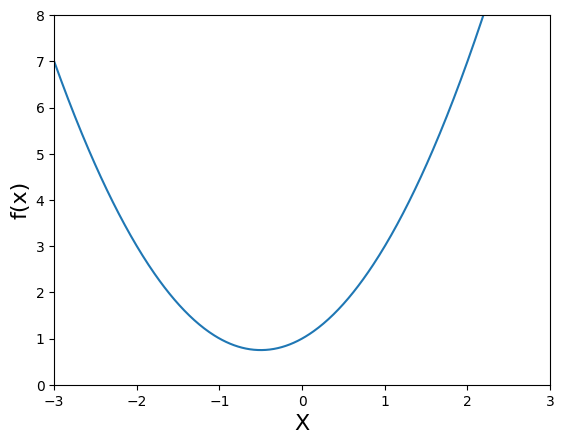

In [4]:
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x1, f(x1))
plt.show()

## Slope & Derivatives

In [6]:
def df(x):
    return 2 * x + 1

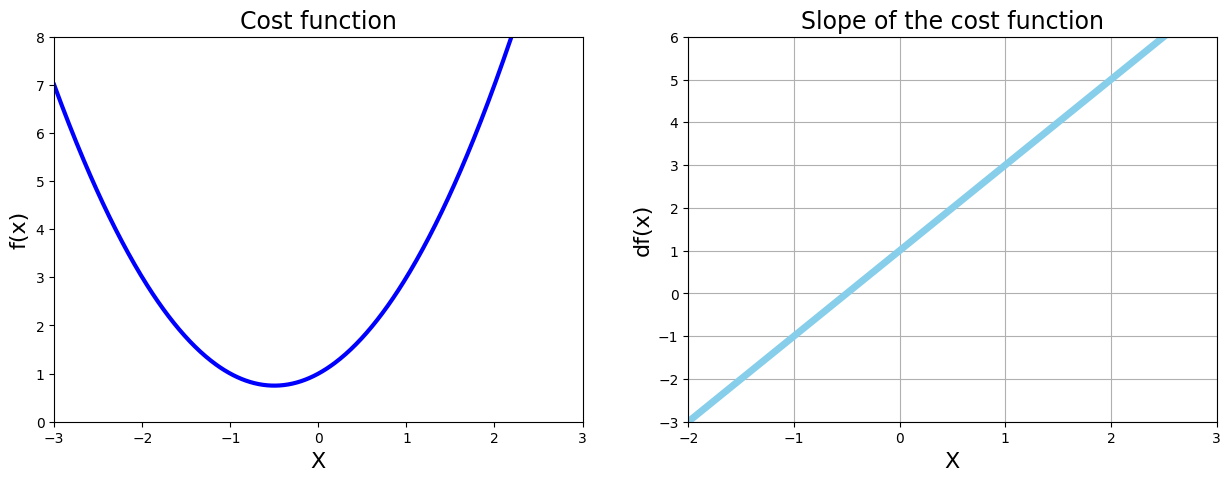

In [7]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x1, f(x1), color='blue', linewidth=3)

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x1, df(x1), color='skyblue', linewidth=5)
plt.show()

## TASK 1

In [8]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED] Calculate the gradient at the current position
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED] Update new_x using the gradient

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


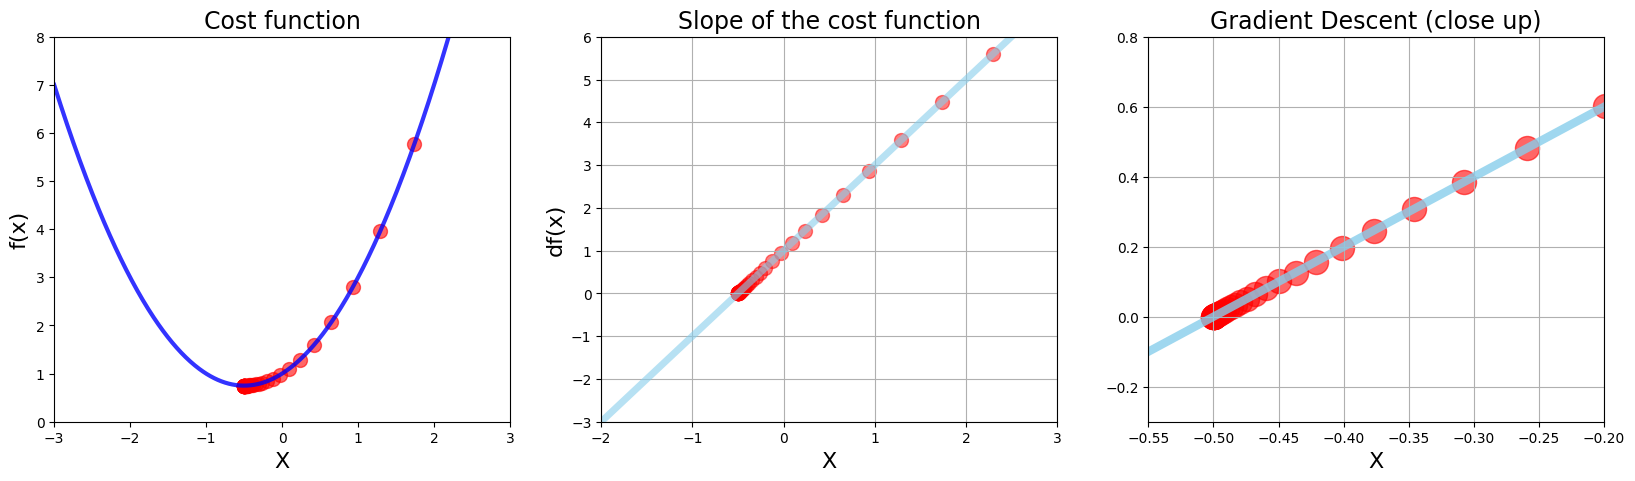

In [9]:

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x1, f(x1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x1, df(x1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x1, df(x1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)
plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## TASK 2

In [11]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5  # [REQUIRED] Define the function g(x)

def dg(x):
    return 4*x**3 - 8*x  # [REQUIRED] Define the derivative of g(x)


## TASK 3

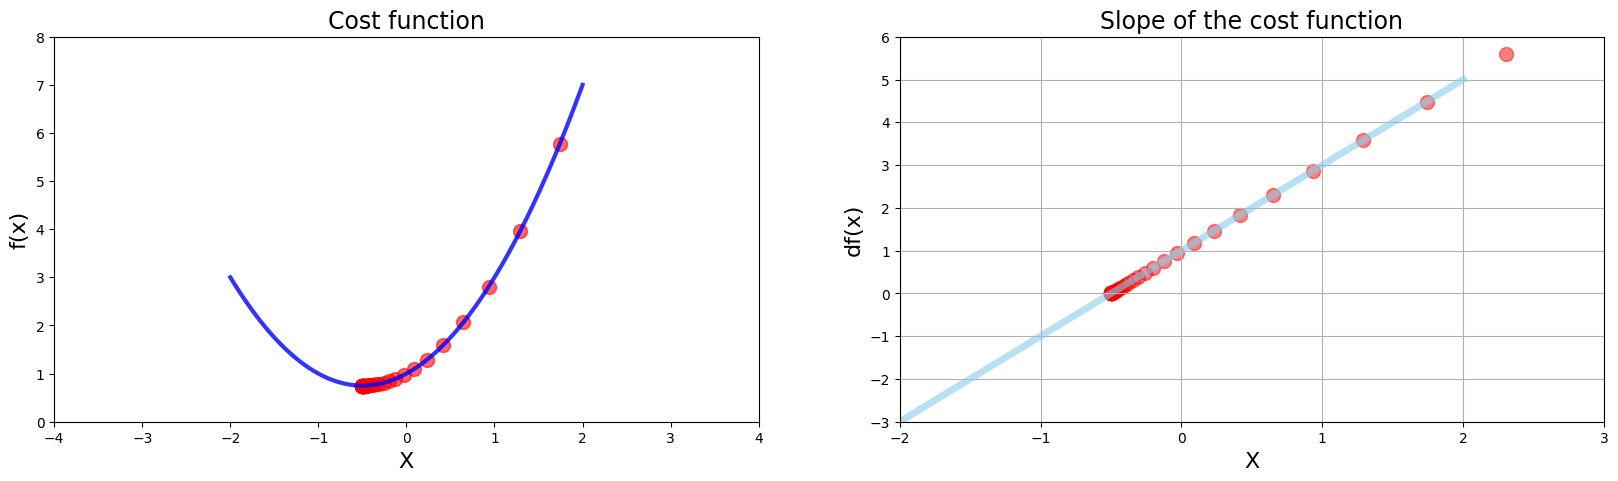

In [25]:
x_2 = np.linspace(-2, 2, 1000)

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-4, 4)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_2, f(x_2), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_2, df(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()

## Gradient Descent

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [16]:
ocal_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: -1.4137636556157256
Number of steps: 34


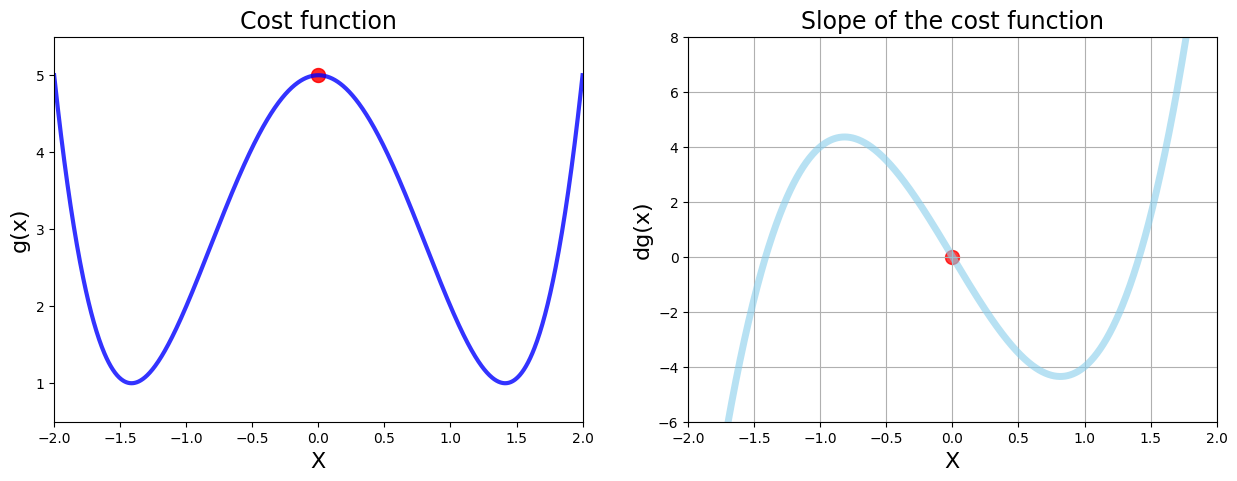

In [17]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

## TASK-4 : Code the same things as they were done for the first two examples

In [19]:
x_3 = np.linspace(-4, 4, 1000)

def g(x):
    return x**5 - 2*x**4 + 2 # [REQUIRED] Define the function g(x)

def dg(x):
    return 5*x**4 - 8*x**3

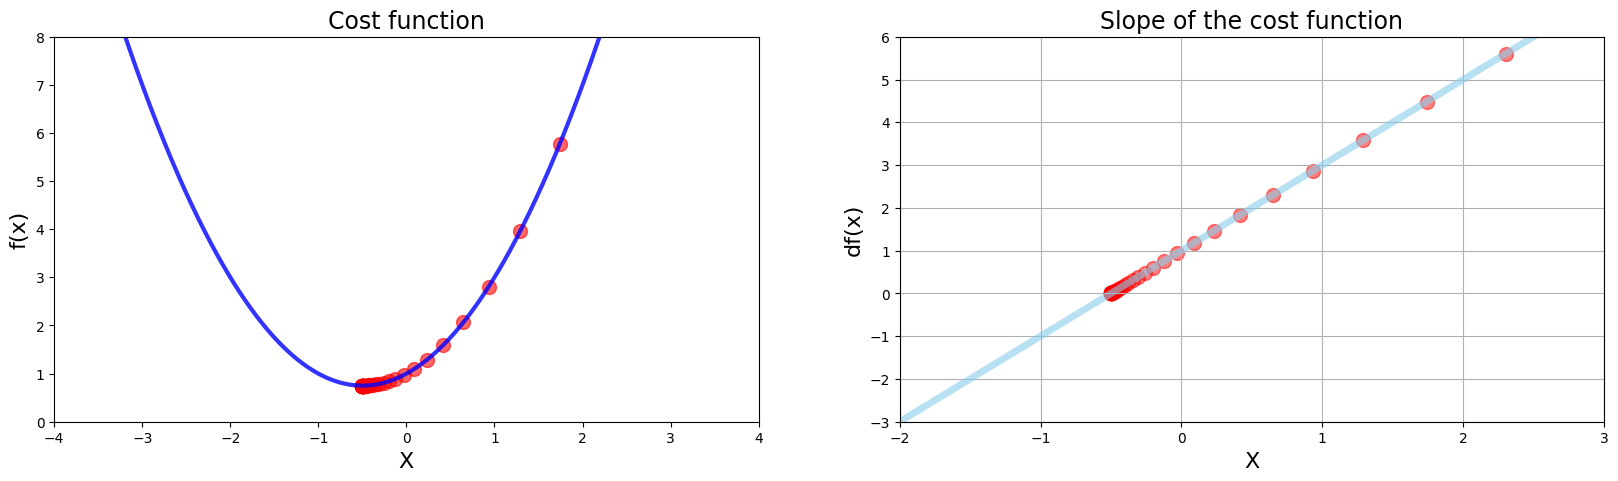

In [20]:
x_3 = np.linspace(-4, 4, 1000)

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-4, 4)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_3, f(x_3), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_3, df(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()

In [21]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.04, precision=0.003,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [23]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.5996556725226643
Number of steps: 77


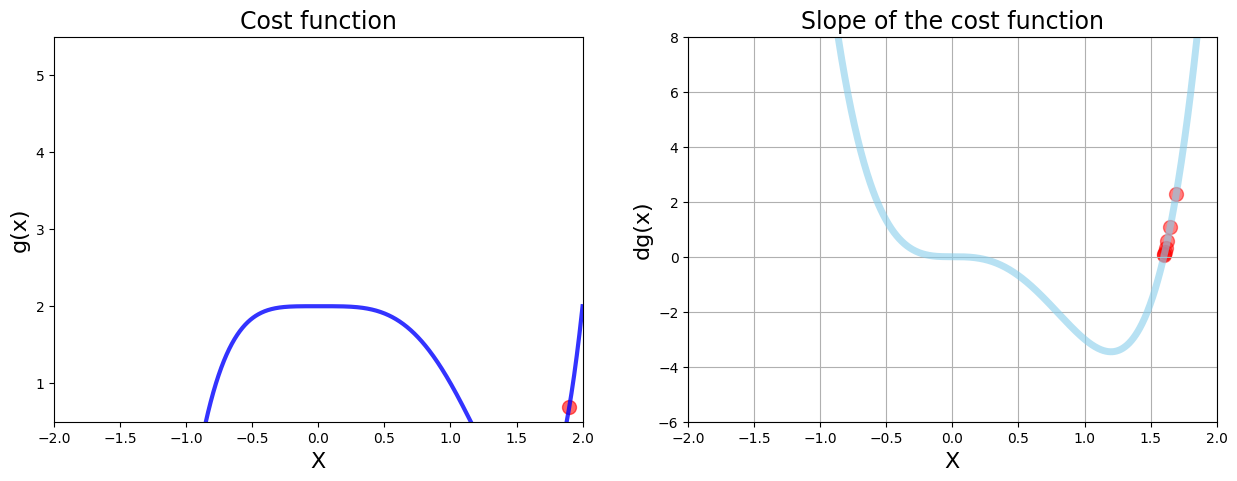

Number of steps is:  8


In [24]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

## TASK-5 : Run gradient descent 3 times

In [26]:
local_min_1, list_x_1, deriv_list_1 = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iter=500)
local_min_2, list_x_2, deriv_list_2 = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.001, max_iter=500)
local_min_3, list_x_3, deriv_list_3 = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.002, max_iter=500)

# TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)

In [37]:
n = 100

low_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.025, precision=0.0001, max_iter=n)


## TASK-7 : Plot reduction in cost for each iteration

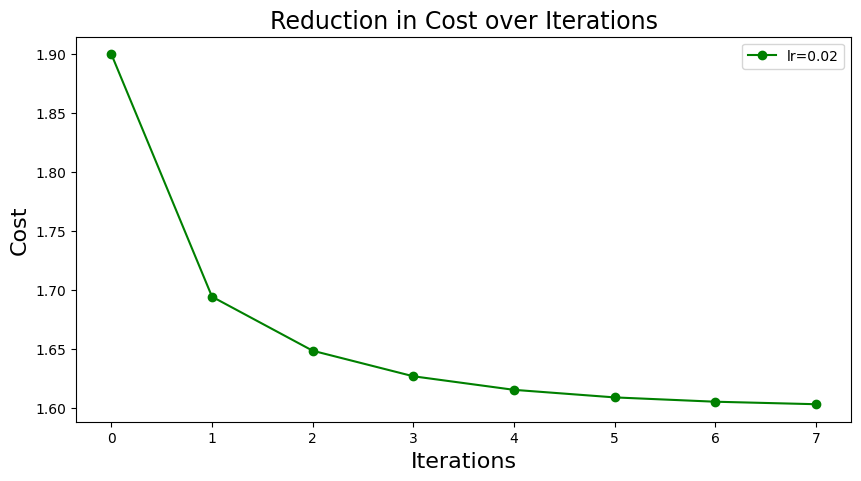

In [38]:
plt.figure(figsize=[10, 5])
plt.title('Reduction in Cost over Iterations', fontsize=17)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)
plt.plot(range(len(list_x)), list_x, marker='o', linestyle='-', color='green', label='lr=0.02')
plt.legend()
plt.show()

## Example 4 - Data Viz with 3D Charts

In [46]:
import numpy as np

def f(x, y):
    return 1 / (3**(-x**2 - y**2) + 1)

def df_dx(x, y):
    # Derivative of f with respect to x
    return 2 * x * np.log(3) * f(x, y) / (3**(-x**2 - y**2) + 1)**2

def df_dy(x, y):
    # Derivative of f with respect to y
    return 2 * y * np.log(3) * f(x, y) / (3**(-x**2 - y**2) + 1)**2

def gradient_descent(derivative_func_x, derivative_func_y, initial_guess, multiplier=0.04, precision=0.003, max_iter=300):
    new_x, new_y = initial_guess
    x_list = [new_x]
    y_list = [new_y]

    for n in range(max_iter):
        previous_x, previous_y = new_x, new_y
        gradient_x = derivative_func_x(previous_x, previous_y)
        gradient_y = derivative_func_y(previous_x, previous_y)

        new_x = previous_x - multiplier * gradient_x
        new_y = previous_y - multiplier * gradient_y

        step_size = np.sqrt((new_x - previous_x)**2 + (new_y - previous_y)**2)
        x_list.append(new_x)
        y_list.append(new_y)

        if step_size < precision:
            break

    return (new_x, new_y), x_list, y_list

# Example
initial_guess = (1, 1)
final_values, x_values, y_values = gradient_descent(df_dx, df_dy, initial_guess)

print(f"Final values of x and y: {final_values}")
print(f"Values of x during iterations: {x_values}")
print(f"Values of y during iterations: {y_values}")


Final values of x and y: (0.17134233912270203, 0.17134233912270203)
Values of x during iterations: [1, 0.9359289313248759, 0.8812634904954291, 0.8343040234385523, 0.7935897464996506, 0.7579327970859847, 0.726392888439454, 0.6982330693355123, 0.6728758544875302, 0.6498663497242305, 0.628843338108332, 0.6095172985451679, 0.5916538967886711, 0.5750616142568656, 0.5595824478341793, 0.5450848748373851, 0.5314584897630545, 0.5186098803221472, 0.5064594281845477, 0.4949388050400097, 0.48398899582473687, 0.47355872502237895, 0.46360319376781933, 0.4540830585939499, 0.4449635995633191, 0.4362140379785786, 0.4278069731102051, 0.4197179142966746, 0.4119248899872726, 0.40440811925952186, 0.39714973437519024, 0.3901335452758372, 0.3833448387326227, 0.3767702062821478, 0.3703973961942811, 0.36421518559935534, 0.3582132696035301, 0.35238216478242546, 0.34671312489476197, 0.34119806702300776, 0.3358295066449246, 0.3306005003823745, 0.3255045953726772, 0.32053578437173824, 0.3156884658338216, 0.3109574

In [47]:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


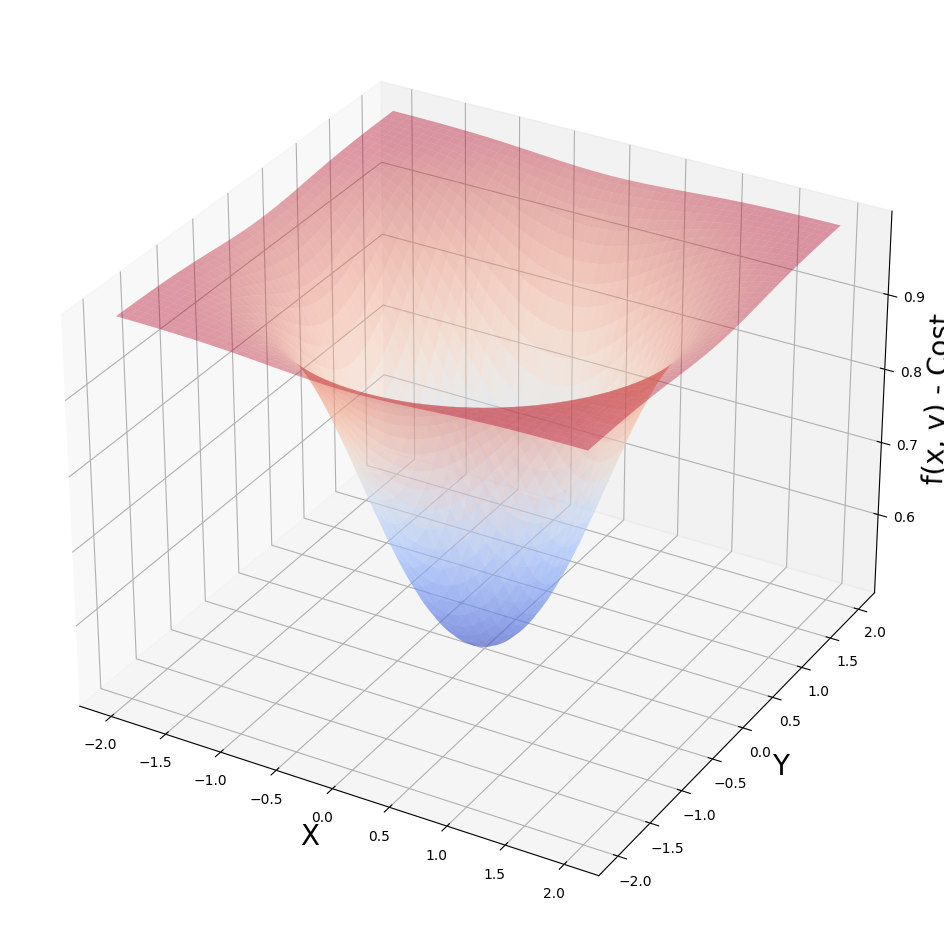

In [48]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.

$$\frac{\partial f}{\partial x}=The partial derivative of f with respect to x

$$\frac{\partial f}{\partial y}=The partial derivative of f with respect to y

for example:



##  $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

# partial derivative  with respect to x
## $$\frac{\partial f}{\partial x} = \frac{2 * x * np.log(3) * f(x, y)}{3**(-x**2 - y**2) + 1)**2}$$

# partial derivative  with respect to y
## $$\frac{\partial f}{\partial y} = \frac{2 * y * np.log(3) * f(x, y)}{(3**(-x**2 - y**2) + 1)**2}$$

In [49]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [50]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000



## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

In [51]:
def fpx(x, y):
    return 2 * x * np.log(3) * f(x, y) / (3**(-x**2 - y**2) + 1)**2

def fpy(x, y):
    return 2 * y * np.log(3) * f(x, y) / (3**(-x**2 - y**2) + 1)**2

In [52]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.41221842e-07 7.84565788e-08]
Minimum occurs at x value of:  5.000604559093482e-07
Minimum occurs at y value of:  2.7781136439408213e-07
The cost is:  0.5000000000000899


### Graphing 3D Gradient Descent

In [53]:
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00060031 0.00033351]
Minimum occurs at x value of:  0.0021256605862345107
Minimum occurs at y value of:  0.0011809225479080619
The cost is:  0.5000016240266347


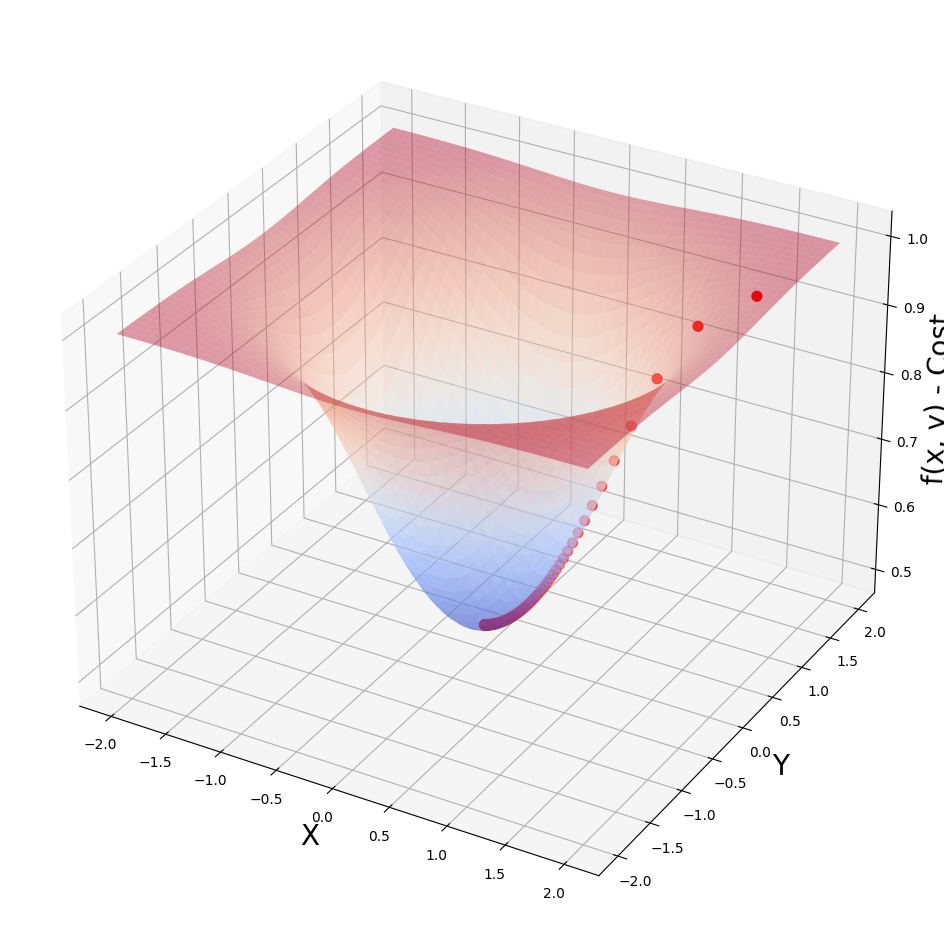

In [54]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

## Example 5 - Working with Data & a Real Cost Function

In [55]:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [56]:
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


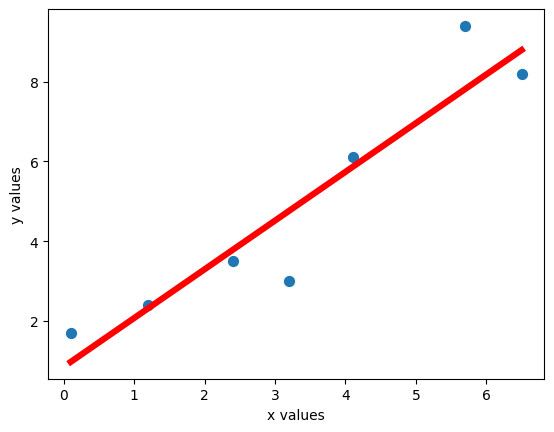

In [57]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='red', linewidth=4.5)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [59]:
y_hat = 0.9456873240 + 1.4563726332*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[ 1.09132459]
 [ 2.69333448]
 [ 4.44098164]
 [ 5.60607975]
 [ 6.91681512]
 [ 9.24701133]
 [10.41210944]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [60]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [61]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [1.95966423]
MSE regression using manual calc is 1.959664234575781
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

In [62]:
nr_thetas = 250
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


In [63]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (250, 250)
Shape of plot_t1 (250, 250)
Shape of plot_cost (250, 250)


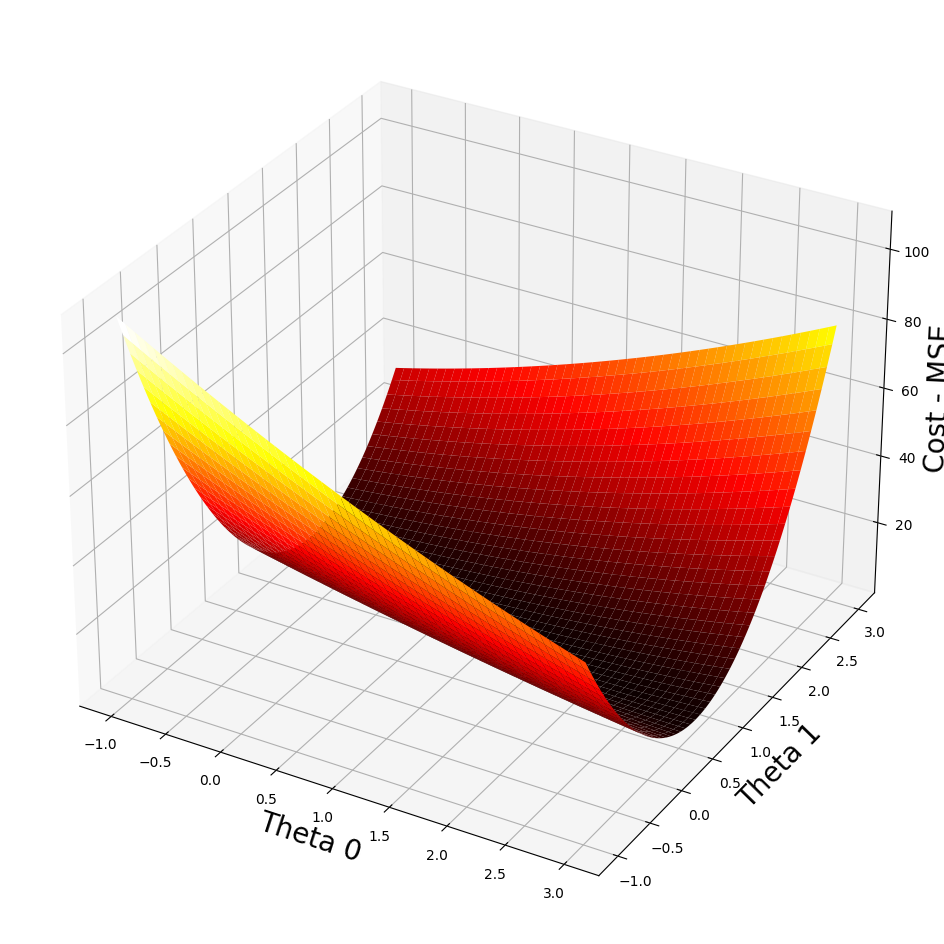

In [64]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [65]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9481352835322931
Min occurs at (i,j): (138, 116)
Min MSE for Theta 0 at plot_t0[111][91] 0.863453815261044
Min MSE for Theta 1 at plot_t1[111][91] 1.2168674698795177


## Partial Derivatives of MSE w.r.t.  θ0  and  θ1

## MSE & Gradient Descent

In [66]:
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    return np.array([theta0_slope[0], theta1_slope[0]])
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [67]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


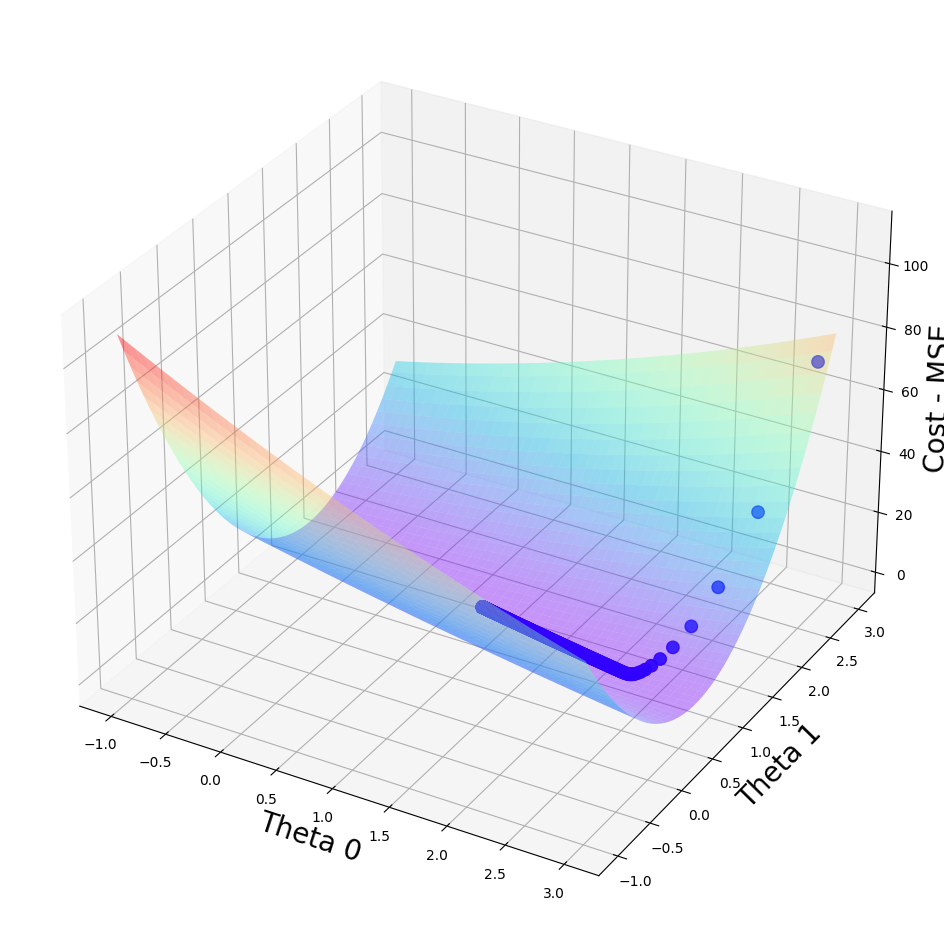

In [68]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='blue')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()